<a href="https://colab.research.google.com/github/Egemenozkurt/ForecastingWeather/blob/main/deneme1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
df=pd.read_csv('Istanbul_Weather_Data.csv')
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,01.01.2009,Partly cloudy,0.23,5,2,8:29:00,17:47:00,11:09:00,22:39:00,10,90,1027,3.5
1,02.01.2009,Overcast,4.48,4,1,8:29:00,17:48:00,11:30:00,23:43:00,12,89,1021,2.5
2,03.01.2009,Overcast,0.08,5,3,8:29:00,17:48:00,11:52:00,NaN,16,94,1021,4.0
3,04.01.2009,Mist,2.91,5,3,8:29:00,17:49:00,0:15:00,12:48:00,9,94,1014,4.0
4,05.01.2009,Overcast,4.32,5,3,8:29:00,17:50:00,0:41:00,1:57:00,15,97,1015,4.0


In [2]:
X = df.iloc[:, 0:]

In [3]:
X

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,AvgTemp
0,01.01.2009,Partly cloudy,0.23,5,2,8:29:00,17:47:00,11:09:00,22:39:00,10,90,1027,3.5
1,02.01.2009,Overcast,4.48,4,1,8:29:00,17:48:00,11:30:00,23:43:00,12,89,1021,2.5
2,03.01.2009,Overcast,0.08,5,3,8:29:00,17:48:00,11:52:00,NaN,16,94,1021,4.0
3,04.01.2009,Mist,2.91,5,3,8:29:00,17:49:00,0:15:00,12:48:00,9,94,1014,4.0
4,05.01.2009,Overcast,4.32,5,3,8:29:00,17:50:00,0:41:00,1:57:00,15,97,1015,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,29.08.2019,Partly cloudy,0.00,27,23,6:27:00,19:43:00,4:47:00,19:26:00,24,61,1015,25.0
3892,30.08.2019,Partly cloudy,0.00,27,22,6:29:00,19:42:00,6:04:00,20:05:00,20,64,1016,24.5
3893,31.08.2019,Patchy rain possible,0.50,26,22,6:30:00,19:40:00,7:21:00,20:40:00,22,63,1015,24.0
3894,01.09.2019,Partly cloudy,0.00,27,22,6:31:00,19:38:00,8:37:00,21:13:00,21,66,1011,24.5


In [14]:
daily_seasonality=True
figure = px.line(df, x="DateTime", 
                 y="AvgTemp", 
                 title='Tempature in Istanbul Over the Years')
figure.show()

In [5]:
figure = px.line(df, x="DateTime", 
                 y="AvgHumidity", 
                 title='Humidity in Istanbul Over the Years')
figure.show()

In [6]:
figure = px.line(df, x="DateTime", 
                 y="AvgWind", 
                 title='Wind Speed in Istanbul Over the Years')
figure.show()

In [7]:
figure = px.scatter(data_frame = df, x="AvgHumidity",
                    y="AvgTemp", size="AvgHumidity", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

In [8]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format = '%d.%m.%Y')
df["month"] = df["DateTime"].dt.month
df['year'] = df['DateTime'].dt.year
print(df.head())

    DateTime      Condition  Rain  MaxTemp  MinTemp  SunRise    SunSet  \
0 2009-01-01  Partly cloudy  0.23        5        2  8:29:00  17:47:00   
1 2009-01-02       Overcast  4.48        4        1  8:29:00  17:48:00   
2 2009-01-03       Overcast  0.08        5        3  8:29:00  17:48:00   
3 2009-01-04           Mist  2.91        5        3  8:29:00  17:49:00   
4 2009-01-05       Overcast  4.32        5        3  8:29:00  17:50:00   

   MoonRise   MoonSet  AvgWind  AvgHumidity  AvgPressure  AvgTemp  month  year  
0  11:09:00  22:39:00       10           90         1027      3.5      1  2009  
1  11:30:00  23:43:00       12           89         1021      2.5      1  2009  
2  11:52:00       NaN       16           94         1021      4.0      1  2009  
3   0:15:00  12:48:00        9           94         1014      4.0      1  2009  
4   0:41:00   1:57:00       15           97         1015      4.0      1  2009  


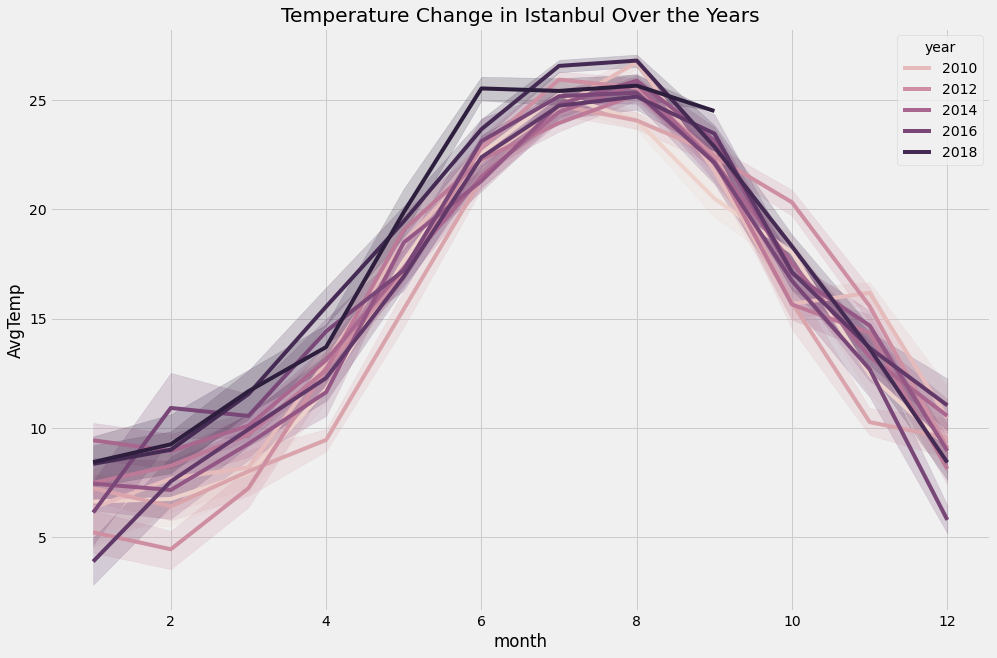

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Istanbul Over the Years")
sns.lineplot(data = df, x='month', y='AvgTemp', hue='year')
plt.show()

In [10]:
forecast_weather = df.rename(columns = {"DateTime": "ds", 
                                       "AvgTemp": "y"})

print(forecast_weather)

             ds             Condition  Rain  MaxTemp  MinTemp  SunRise  \
0    2009-01-01         Partly cloudy  0.23        5        2  8:29:00   
1    2009-01-02              Overcast  4.48        4        1  8:29:00   
2    2009-01-03              Overcast  0.08        5        3  8:29:00   
3    2009-01-04                  Mist  2.91        5        3  8:29:00   
4    2009-01-05              Overcast  4.32        5        3  8:29:00   
...         ...                   ...   ...      ...      ...      ...   
3891 2019-08-29         Partly cloudy  0.00       27       23  6:27:00   
3892 2019-08-30         Partly cloudy  0.00       27       22  6:29:00   
3893 2019-08-31  Patchy rain possible  0.50       26       22  6:30:00   
3894 2019-09-01         Partly cloudy  0.00       27       22  6:31:00   
3895 2019-09-02         Partly cloudy  0.00       27       22  6:32:00   

        SunSet  MoonRise   MoonSet  AvgWind  AvgHumidity  AvgPressure     y  \
0     17:47:00  11:09:00  22:39:

In [11]:
forecast_humidity = df.rename(columns = {"DateTime": "ds", 
                                       "AvgHumidity": "y"})

print(forecast_humidity)

             ds             Condition  Rain  MaxTemp  MinTemp  SunRise  \
0    2009-01-01         Partly cloudy  0.23        5        2  8:29:00   
1    2009-01-02              Overcast  4.48        4        1  8:29:00   
2    2009-01-03              Overcast  0.08        5        3  8:29:00   
3    2009-01-04                  Mist  2.91        5        3  8:29:00   
4    2009-01-05              Overcast  4.32        5        3  8:29:00   
...         ...                   ...   ...      ...      ...      ...   
3891 2019-08-29         Partly cloudy  0.00       27       23  6:27:00   
3892 2019-08-30         Partly cloudy  0.00       27       22  6:29:00   
3893 2019-08-31  Patchy rain possible  0.50       26       22  6:30:00   
3894 2019-09-01         Partly cloudy  0.00       27       22  6:31:00   
3895 2019-09-02         Partly cloudy  0.00       27       22  6:32:00   

        SunSet  MoonRise   MoonSet  AvgWind   y  AvgPressure  AvgTemp  month  \
0     17:47:00  11:09:00  22:39

In [12]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_weather)
forecasts = model.make_future_dataframe(periods=3650)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kq4xgym/y97fbnap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kq4xgym/w3_e2dxo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74143', 'data', 'file=/tmp/tmp4kq4xgym/y97fbnap.json', 'init=/tmp/tmp4kq4xgym/w3_e2dxo.json', 'output', 'file=/tmp/tmp4kq4xgym/prophet_modell954r2i2/prophet_model-20230313202830.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
model_hum = Prophet()
model_hum.fit(forecast_humidity)
forecasts_hum = model_hum.make_future_dataframe(periods=3650)
predictions_hum = model_hum.predict(forecasts_hum)
plot_plotly(model_hum, predictions_hum)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kq4xgym/dsffg1u2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4kq4xgym/73o2ke87.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3284', 'data', 'file=/tmp/tmp4kq4xgym/dsffg1u2.json', 'init=/tmp/tmp4kq4xgym/73o2ke87.json', 'output', 'file=/tmp/tmp4kq4xgym/prophet_modelw5vfcxsq/prophet_model-20230313202835.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:28:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
